# MNIST Logistic Regression: Binary Classification

Task: Using logistic regression, classify all the digits in the MNIST data set that are not ones from the one
that are one.

In [2]:
#imports a bunch of libraries
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [3]:
#fetches the mnist dataset
mnist = fetch_openml('mnist_784', version = 1)

In [4]:
#prints the keys of the dataset
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
#sets the data as the x input and the target as the y output
x, y = mnist['data'], mnist['target']

In [6]:
#splits the data into trainging and test data
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [7]:
#sets the output into Booleans that are true when the label is 1 and false otherwise
y_train_1 = (y_train == '1')
y_test_1 = (y_test == '1')

In [8]:
#prints the length of the training data
len(x_train)

52500

In [9]:
#prints the length of the test data
len(x_test)

17500

In [12]:
#scales the inputs so that the logistic regression runs correctly
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [13]:
#fits a logistic regression model to the training data
clf = LogisticRegression(max_iter = 10000)
clf.fit(x_train, y_train_1)

LogisticRegression(max_iter=10000)

In [14]:
#scores the logistic regression model 
clf.score(x_test, y_test_1)

0.9908

In [56]:
#stores the predicted values for the test x's
y_predicted = clf.predict(x_test)
#plots a confusion matrix between the test y's and predicted y's
cm = confusion_matrix(y_test_1, y_predicted)
cm

array([[15355,    94],
       [   67,  1984]])

In [52]:
#defines a funciton that plots the confusion matrix using seaborn
def plot_cm(cm):
    plt.figure(figsize = (10,7))
    sn.heatmap(cm, annot = True)
    plt.xlabel('predicted')
    plt.ylabel('Truth')
    return cm

array([[15355,    94],
       [   67,  1984]])

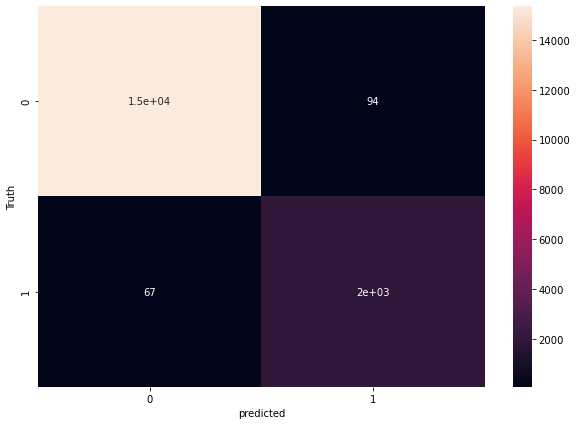

In [53]:
#plots the confusion matrix
plot_cm(cm)

In [58]:
#sets the probabity that each of the training x's are 1 into a variable
y_pred_proba_tr = clf.predict_proba(x_train)[::,1]

In [59]:
#calculates the fpr and fpr for a range of thresholds and sets them to corresponding variables
fpr, tpr, thresholds = roc_curve(y_train_1, y_pred_proba_tr)

In [60]:
#defines a function that will plot an roc curve taking the false positive rate and true positive rate as inputs
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    #creates dashed diagonal for reference to what a random classifier would achieve with binary outcomes
    plt.plot([0,1], [0,1],'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

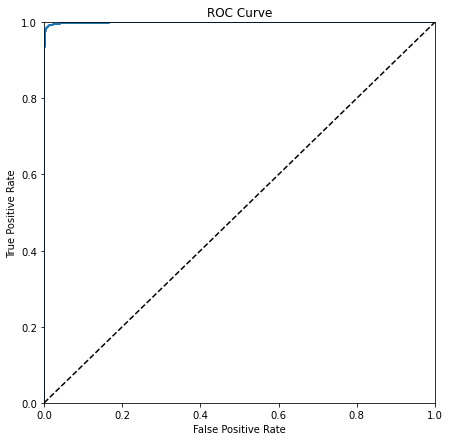

In [61]:
#plots the roc curve
plot_roc_curve(fpr, tpr)
plt.rcParams['figure.figsize'] = [7, 7]
plt.show()

The ROC curve demonstrates that the models is close to perfect as the curve almost reaches the (0,1). This makes sense considering that we obtained an accuracy score of over 99%.

In [62]:
#calculates the optimal threshold by optimizing the geometric mean: sqrt(tpr*(1-fpr))
optimal_idx = np.argmax(np.sqrt(tpr*(1-fpr)))
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)

Threshold value is: 0.16550775784769342


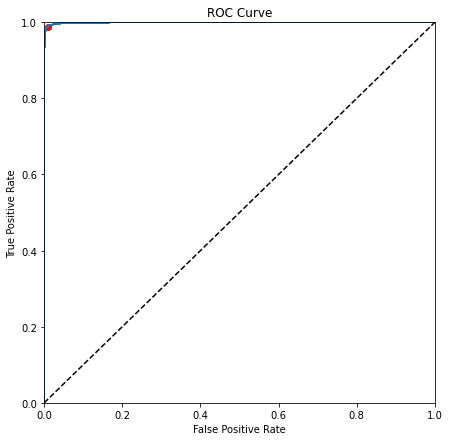

In [63]:
#plots the roc curve with the optimal threshold as a red dot
plot_roc_curve(fpr, tpr)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red')
plt.rcParams['figure.figsize'] = [7, 7]
plt.show()

The red dot in the above ROC curve represents the chosen optimal threshold.

In [64]:
#prints the FPR
fpr[optimal_idx]

0.008805759094999357

In [65]:
#prints the TPR
tpr[optimal_idx]

0.9886714727085479

In [66]:
#prints the sensitivity and the specificity for the chosen threshold
print('The Sensitivity is:', tpr[optimal_idx])
print('The Specificity is:', 1-fpr[optimal_idx])

The Sensitivity is: 0.9886714727085479
The Specificity is: 0.9911942409050006


In [74]:
#finds the confusion matrix given for logistic regression with the chosen threshold
y_pred_proba_test = clf.predict_proba(x_test)[::,1]
y_thr_pred_test = (y_pred_proba_test > optimal_threshold)

cm_thr = confusion_matrix(y_test_1 ,y_thr_pred_test)

cm_thr

array([[15265,   184],
       [   39,  2012]])

array([[15265,   184],
       [   39,  2012]])

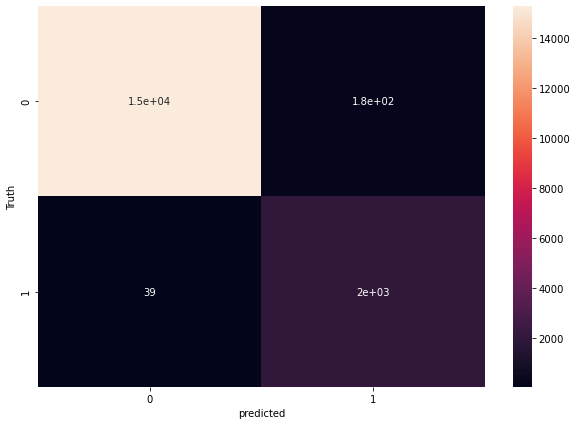

In [75]:
#plots the confusion matrix
plot_cm(cm_thr)

This confusion matrix has more false positives and less false negatives than the default logistic regression, which makes sense, since I lowered the threshold from the default at 0.5 to 0.165. 